In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

from GRDECL2VTK import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Exampel 1 - Load grid data with perm and porosity

In [3]:
#Model=GeologyModel(filename='./ExampleData/Simple3x3x1.grdecl')
#Model=GeologyModel(filename='./ExampleData/Simple20x20x5.grdecl')
#Model=GeologyModel(filename='./ExampleData/Simple20x20x5_Fault.grdecl')
#Model=GeologyModel(filename='./ExampleData/Simple10x10x3_Flat_Fault.grdecl')
#Model=GeologyModel(filename='./ExampleData/Simple10x10x3_FlatCross_Fault.grdecl')
#Model=GeologyModel(filename='./ExampleData/40X48x1_3fatults.grdecl')
#Model=GeologyModel(filename='./ExampleData/snarkgrid.grdecl')
Model=GeologyModel(filename='./ExampleData/dome.grdecl')
#Model=GeologyModel(filename='./ExampleData/pillar_36x48.grdecl')
#Model=GeologyModel(filename='./ExampleData/Johansen.grdecl')
#Model=GeologyModel(filename='./ExampleData/Norne.GRDECL')

Model.GRDECL2VTK()
Model.Write2VTU()

[Input] Reading ECLIPSE/PETREL file "./ExampleData/dome.grdecl" ....
     Grid Type=CornerPoint
     Grid Dimension(NX,NY,NZ): (20 x 20 x 4)
     NumOfGrids=1600
     NumOfKeywords=11
     Reading Keywords [SPECGRID]      [PORO]      [PERMX]      [PERMY]      [PERMZ] .....Done!
[Geometry] Converting GRDECL to Paraview Hexahedron mesh data....
     NumOfPoints 12800
     NumOfCells 1600
     .....Done!
[Output] Writing "Results\dome.vtu" Paraview file....Done!


[FaultProcess] Found 7 faults.
Added 1 new intersection pts
[FaultProcess] Domain is splitted as 6 polygons.


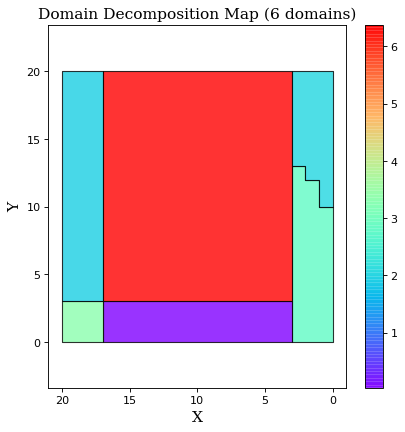

[Output] Writing "Results\dome.vtu" Paraview file....Done!


In [4]:
Model.decomposeModel()
Model.Write2VTU()

In [5]:
Model.Write2VTP()

[Output] Writing "Results\dome.vtu" Paraview file....Done!
[Output] Writing "Results\dome.vtp" VTP file..vtp file created.


### Interactive Visulization directly from Jupyter Notebook (using pyvista)

In [6]:
try:
    import pyvista as pv
except ImportError:
    import warnings
    warnings.warn("No vtk notebook viewer module pyvista loaded.")

In [7]:
mesh = pv.read('Results\dome.vtp')
mesh

PolyData (0xc557a68)
  N Cells:	9600
  N Points:	12800
  X Bounds:	-2.247e+01, 1.630e+03
  Y Bounds:	-1.242e+03, 5.627e+01
  Z Bounds:	1.999e+03, 2.646e+03
  N Arrays:	6

In [ ]:
pl = pv.PlotterITK()
pl.add_mesh(mesh, scalars='PORO', smooth_shading=True)
pl.show(True)

In [9]:
mesh.plot(scalars="PORO",show_edges=True, notebook=False)

Viewer(geometries=[{'vtkClass': 'vtkPolyData', 'points': {'vtkClass': 'vtkPoints', 'name': '_points', 'numberO…

Viewer(geometries=[{'vtkClass': 'vtkPolyData', 'points': {'vtkClass': 'vtkPoints', 'name': '_points', 'numberO…

In [8]:
mesh.plot(scalars="PORO",show_edges=True, notebook=False)

AttributeError: 'vtkRenderingOpenGL2Python.vtkWin32RenderWindowInte' object has no attribute 'ProcessEvents'

In [ ]:
mesh.plot(scalars="PORO",show_edges=True, notebook=True)

### Exampel 2 - Load grid data and adding any custom field

In [7]:
Model=GeologyModel(filename='./ExampleData/dome.grdecl')

TempData=Model.LoadCellData(varname="TEMP",filename='./ExampleData/dome_Temperature.txt')
Model.GRDECL2VTK()
Model.Write2VTU()

[Input] Reading ECLIPSE/PETREL file "./ExampleData/dome.grdecl" ....
     Grid Type=CornerPoint
     Grid Dimension(NX,NY,NZ): (20 x 20 x 4)
     NumOfGrids=1600
     NumOfKeywords=11
     Reading Keywords [SPECGRID]      [PORO]      [PERMX]      [PERMY]      [PERMZ] .....Done!
[Input] Reading ECLIPSE/PETREL file "./ExampleData/dome_Temperature.txt" ....
     Reading Keywords [TEMP] 
     New variable [TEMP] loaded from file!
[Geometry] Converting GRDECL to Paraview Hexahedron mesh data....
     NumOfPoints 12800
     NumOfCells 1600
     .....Done!
[Output] Writing "Results\dome.vtu" Paraview file....Done!
